In [2]:
import ugradio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table

%matplotlib inline
plt.rcParams['mathtext.fontset'], plt.rcParams['font.family'] = 'stix', 'STIXGeneral'
plt.rcParams.update({'font.size': 15})

# 5.2 Digital Sampling and the Nyquist Criterion

### 5.2.2. Option 2: Using the Laboratory PicoSampler 2000

We choose the sampling frequency to be 6.25 MHz. We used a divisor of 10 (N=10). We changed the wave generator's sampling frequency, $\nu_o$, such that $\nu_o = (0.1, 0.2, ... , 0.9)\nu_s$. We then collected the data (raw data given in 'final_data.csv').

In [97]:
vs = 6.25e6 # 6.25 MHz sampling frequency

In [98]:
data = pd.read_csv('final_data.csv')

In [99]:
data

,Unnamed: 0,0.625 MHz,1.25 MHz,1.875 MHz,2.5 MHz,3.125 MHz,3.75 MHz,4.375 MHz,5 MHz,5.625 MHz,6.25 MHz
0,0,6912,-9984,-5888,11264,-10496,-4096,-15360,7680,1536,12800
1,1,14080,-15360,-12544,-2304,10496,-5888,7936,15360,10240,12800
2,2,16128,512,13568,-7680,-10496,13312,10496,2048,15104,12800
3,3,11776,15616,4096,14592,10496,-15872,-14592,-14080,14080,12800
4,4,3072,8960,-16128,-15872,-10496,12288,-1536,-10752,7680,12800
...,...,...,...,...,...,...,...,...,...,...,...
15995,15995,-12800,-15872,14592,14848,-11008,2048,15872,10240,15360,14848
15996,15996,-16128,-2304,-11008,-8448,11008,7680,-3584,-8192,11008,14848
15997,15997,-13312,14592,-7936,-1280,-11008,-14336,-13568,-15360,2304,14848
15998,15998,-5376,11264,15872,10496,11008,15616,12032,-1280,-7168,14848


$\Delta t = 1/\nu_s \implies \Delta t = 1.6 \times 10^{-7} s$

The picosampler collects 16,000 samples each time it is run. Therefore the total time is 0.00256 s.

When we plot the data we have to divide by 2^15 to account for the bit rate of the picosampler. This will then give us the true peak-to-peak amplitude of the driven waves, which was set to 1V.

### 5.2.4. Elements Common to All Options

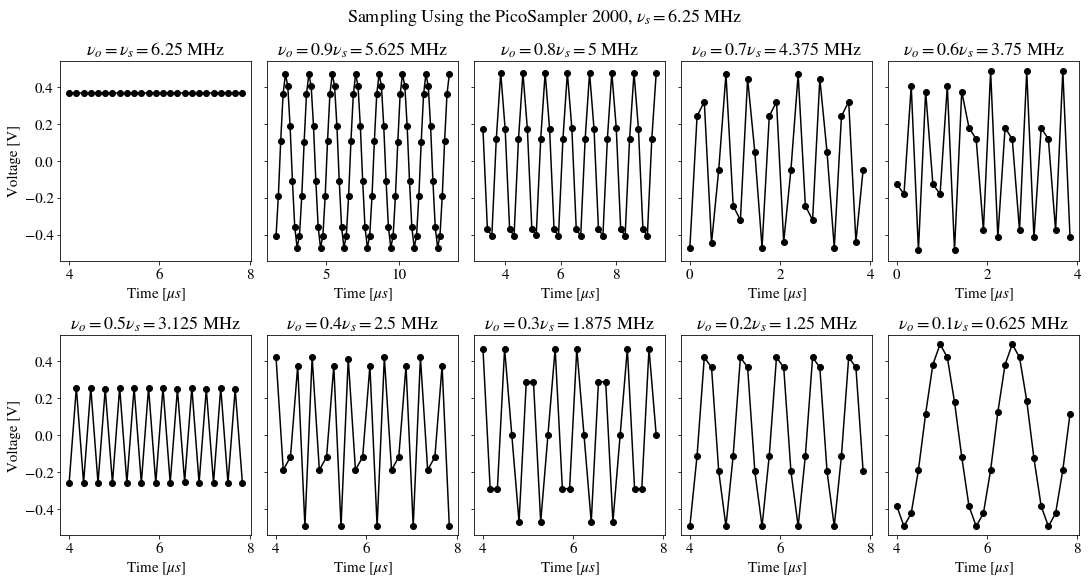

In [5]:
times = np.linspace(0, 0.00256, 16000)


fig, axs = plt.subplots(2,5, sharey=True, figsize=(15,8), constrained_layout=True)
plt.suptitle('Sampling Using the PicoSampler 2000, $\\nu_s = 6.25$ MHz')

axs[0,0].plot(times[25:50]*10**6, data['6.25 MHz'][25:50]/2**15, 'k', marker='o')
axs[0,0].set_title('$\\nu_o = \\nu_s = 6.25$ MHz')
axs[0,0].set_ylabel('Voltage [V]')
axs[0,0].set_xlabel('Time [$\\mu s$]')

axs[0,1].plot(times[10:85]*10**6, data['5.625 MHz'][10:85]/2**15, 'k', marker='o')
axs[0,1].set_title('$\\nu_o = 0.9\\nu_s = 5.625$ MHz')
axs[0,1].set_xlabel('Time [$\\mu s$]')

axs[0,2].plot(times[20:60]*10**6, data['5 MHz'][20:60]/2**15, 'k', marker='o')
axs[0,2].set_title('$\\nu_o = 0.8\\nu_s = 5$ MHz')
#axs[0,2].set_ylabel('Voltage [V]')
axs[0,2].set_xlabel('Time [$\\mu s$]')

axs[0,3].plot(times[:25]*10**6, data['4.375 MHz'][:25]/2**15, 'k', marker='o')
axs[0,3].set_title('$\\nu_o = 0.7\\nu_s = 4.375$ MHz')
axs[0,3].set_xlabel('Time [$\\mu s$]')

axs[0,4].plot(times[:25]*10**6, data['3.75 MHz'][:25]/2**15, 'k', marker='o')
axs[0,4].set_title('$\\nu_o = 0.6\\nu_s = 3.75$ MHz')
axs[0,4].set_xlabel('Time [$\\mu s$]')

axs[1,0].plot(times[25:50]*10**6, data['3.125 MHz'][25:50]/2**15, 'k', marker='o')
axs[1,0].set_title('$\\nu_o = 0.5\\nu_s = 3.125$ MHz')
axs[1,0].set_xlabel('Time [$\\mu s$]')
axs[1,0].set_ylabel('Voltage [V]')

axs[1,1].plot(times[25:50]*10**6, data['2.5 MHz'][25:50]/2**15, 'k', marker='o')
axs[1,1].set_title('$\\nu_o = 0.4\\nu_s = 2.5$ MHz')
#axs[1,1].set_ylabel('Voltage [V]')
axs[1,1].set_xlabel('Time [$\\mu s$]')

axs[1,2].plot(times[25:50]*10**6, data['1.875 MHz'][25:50]/2**15, 'k', marker='o')
axs[1,2].set_title('$\\nu_o = 0.3\\nu_s = 1.875$ MHz')
axs[1,2].set_xlabel('Time [$\\mu s$]')

axs[1,3].plot(times[25:50]*10**6, data['1.25 MHz'][25:50]/2**15, 'k', marker='o')
axs[1,3].set_title('$\\nu_o = 0.2\\nu_s = 1.25$ MHz')
#axs[1,3].set_ylabel('Voltage [V]')
axs[1,3].set_xlabel('Time [$\\mu s$]')

axs[1,4].plot(times[25:50]*10**6, data['0.625 MHz'][25:50]/2**15, 'k', marker='o')
axs[1,4].set_title('$\\nu_o = 0.1\\nu_s = 0.625$ MHz')
axs[1,4].set_xlabel('Time [$\\mu s$]')



plt.show()

Given the values of $\nu_o$ used, we should expect the period of the collected waves to follow the relationship $T=1/\nu_o$.

Using this relationship: $ T = 1.6, 0.8, 0.533, 0.4, 0.32, 0.267, 0.228, 0.2, 0.178, 0.16 \mu s$, respectively. These values appear to be in line with what the plotted data shows.

We now want to derive and plot the Fourier power spectrum for each of the datasets collected:

In [6]:
fft0 = np.fft.fft(data['0.625 MHz']/2**15)
fft1 = np.fft.fft(data['1.25 MHz']/2**15)
fft2 = np.fft.fft(data['1.875 MHz']/2**15)
fft3 = np.fft.fft(data['2.5 MHz']/2**15)
fft4 = np.fft.fft(data['3.125 MHz']/2**15)
fft5 = np.fft.fft(data['3.75 MHz']/2**15)
fft6 = np.fft.fft(data['4.375 MHz']/2**15)
fft7 = np.fft.fft(data['5 MHz']/2**15)
fft8 = np.fft.fft(data['5.625 MHz']/2**15)
fft9 = np.fft.fft(data['6.25 MHz']/2**15)

In [7]:
shift0 = np.fft.fftshift(fft0)
shift1 = np.fft.fftshift(fft1)
shift2 = np.fft.fftshift(fft2)
shift3 = np.fft.fftshift(fft3)
shift4 = np.fft.fftshift(fft4)
shift5 = np.fft.fftshift(fft5)
shift6 = np.fft.fftshift(fft6)
shift7 = np.fft.fftshift(fft7)
shift8 = np.fft.fftshift(fft8)
shift9 = np.fft.fftshift(fft9)

x = np.fft.fftshift(np.fft.fftfreq(16000, 1/vs)/1e6)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


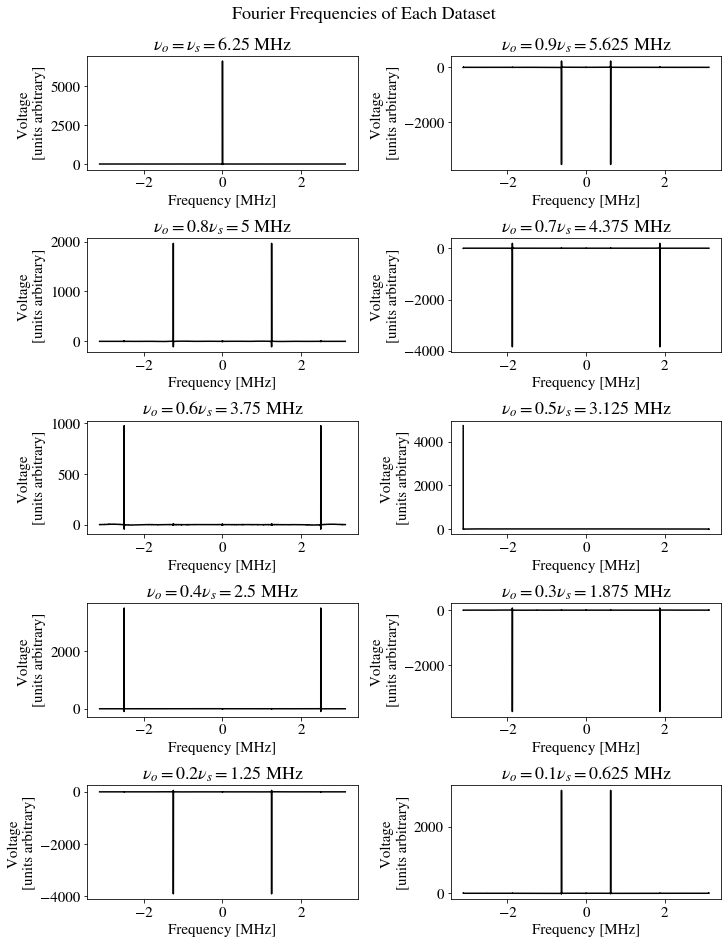

In [8]:
fig, axs = plt.subplots(5,2, sharex=False, sharey=False, figsize=(10,13), constrained_layout=True)
plt.suptitle('Fourier Frequencies of Each Dataset')

axs[0,0].plot(x, shift9, 'k')
axs[0,0].set_title('$\\nu_o = \\nu_s = 6.25$ MHz')
axs[0,0].set_ylabel('Voltage \n[units arbitrary]')
axs[0,0].set_xlabel('Frequency [MHz]')

axs[0,1].plot(x, shift8, 'k')
axs[0,1].set_title('$\\nu_o = 0.9\\nu_s = 5.625$ MHz')
axs[0,1].set_ylabel('Voltage \n[units arbitrary]')
axs[0,1].set_xlabel('Frequency [MHz]')

axs[1,0].plot(x, shift7, 'k')
axs[1,0].set_title('$\\nu_o = 0.8\\nu_s = 5$ MHz')
axs[1,0].set_ylabel('Voltage \n[units arbitrary]')
axs[1,0].set_xlabel('Frequency [MHz]')

axs[1,1].plot(x, shift6, 'k')
axs[1,1].set_title('$\\nu_o = 0.7\\nu_s = 4.375$ MHz')
axs[1,1].set_ylabel('Voltage \n[units arbitrary]')
axs[1,1].set_xlabel('Frequency [MHz]')

axs[2,0].plot(x, shift5, 'k')
axs[2,0].set_title('$\\nu_o = 0.6\\nu_s = 3.75$ MHz')
axs[2,0].set_ylabel('Voltage \n[units arbitrary]')
axs[2,0].set_xlabel('Frequency [MHz]')

axs[2,1].plot(x, shift4, 'k')
axs[2,1].set_title('$\\nu_o = 0.5\\nu_s = 3.125$ MHz')
axs[2,1].set_ylabel('Voltage \n[units arbitrary]')
axs[2,1].set_xlabel('Frequency [MHz]')

axs[3,0].plot(x, shift3, 'k')
axs[3,0].set_title('$\\nu_o = 0.4\\nu_s = 2.5$ MHz')
axs[3,0].set_ylabel('Voltage \n[units arbitrary]')
axs[3,0].set_xlabel('Frequency [MHz]')

axs[3,1].plot(x, shift2, 'k')
axs[3,1].set_title('$\\nu_o = 0.3\\nu_s = 1.875$ MHz')
axs[3,1].set_ylabel('Voltage \n[units arbitrary]')
axs[3,1].set_xlabel('Frequency [MHz]')

axs[4,0].plot(x, shift1, 'k')
axs[4,0].set_title('$\\nu_o = 0.2\\nu_s = 1.25$ MHz')
axs[4,0].set_ylabel('Voltage \n[units arbitrary]')
axs[4,0].set_xlabel('Frequency [MHz]')

axs[4,1].plot(x, shift0, 'k')
axs[4,1].set_title('$\\nu_o = 0.1\\nu_s = 0.625$ MHz')
axs[4,1].set_ylabel('Voltage \n[units arbitrary]')
axs[4,1].set_xlabel('Frequency [MHz]')
 

plt.show()

We can determine the Nyquist Criterion by analyzing these plots. The value of these plots is in the comparision of the expected input frequency to the resulting Fourier frequencies obtained through the voltage spectra. If the two frequencies align then there isn't aliasing and you have sampled appropriately. It is noted that for $\nu_o \geq 0.5\nu_s$ the frequencies no longer align. This argues improper sampling was done and aliasing has occurred.

# 5.3 Voltage Spectra and Power Spectra

Lets generate the voltage spectra for each data set, simultaeously overplotting the real and imaginary components of each.

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:128: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


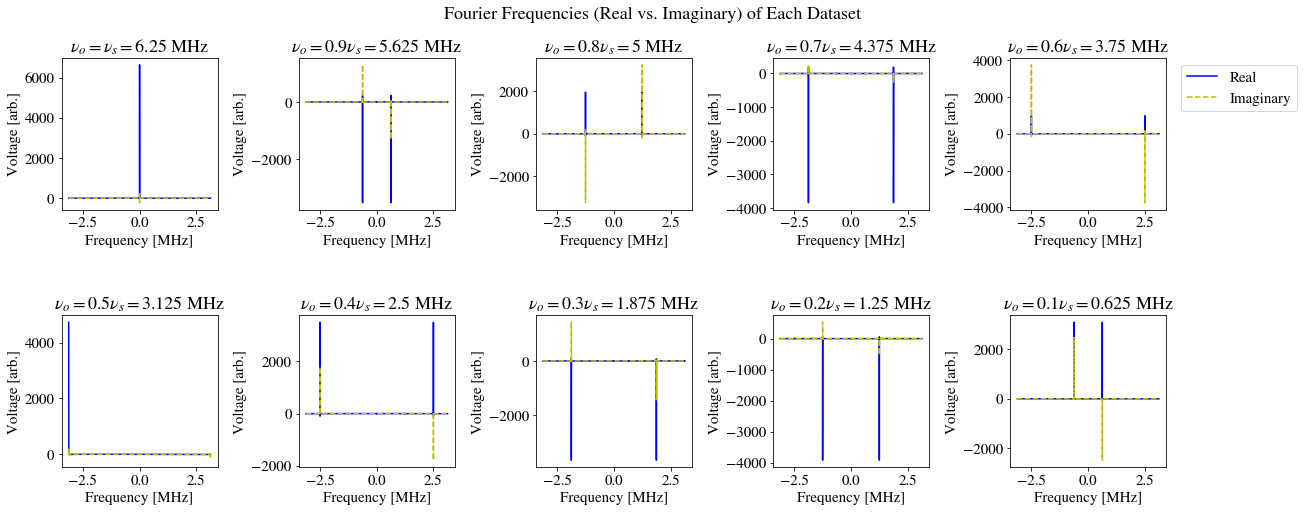

In [9]:
fig, axs = plt.subplots(2,5, sharex=False, sharey=False, figsize=(18,7), constrained_layout=True)
plt.suptitle('Fourier Frequencies (Real vs. Imaginary) of Each Dataset')

axs[0,0].plot(x, shift9.real, 'b-', label='Real')
axs[0,0].plot(x, shift9.imag, 'y--', label='Imaginary')
axs[0,0].set_title('$\\nu_o = \\nu_s = 6.25$ MHz')
axs[0,0].set_xlabel('Frequency [MHz]')
axs[0,0].set_ylabel('Voltage [arb.]')
#axs[0,0].legend()

axs[0,1].plot(x, shift8.real, 'b-', label='Real')
axs[0,1].plot(x, shift8.imag, 'y--', label='Imaginary')
axs[0,1].set_title('$\\nu_o = 0.9\\nu_s = 5.625$ MHz')
axs[0,1].set_xlabel('Frequency [MHz]')
axs[0,1].set_ylabel('Voltage [arb.]')
#axs[0,1].legend()

axs[0,2].plot(x, shift7.real, 'b-', label='Real')
axs[0,2].plot(x, shift7.imag, 'y--', label='Imaginary')
axs[0,2].set_title('$\\nu_o = 0.8\\nu_s = 5$ MHz')
axs[0,2].set_xlabel('Frequency [MHz]')
axs[0,2].set_ylabel('Voltage [arb.]')
#axs[0,2].legend()

axs[0,3].plot(x, shift6.real, 'b-', label='Real')
axs[0,3].plot(x, shift6.imag, 'y--', label='Imaginary')
axs[0,3].set_title('$\\nu_o = 0.7\\nu_s = 4.375$ MHz')
axs[0,3].set_xlabel('Frequency [MHz]')
axs[0,3].set_ylabel('Voltage [arb.]')
#axs[0,3].legend()

axs[0,4].plot(x, shift5.real, 'b-', label='Real')
axs[0,4].plot(x, shift5.imag, 'y--', label='Imaginary')
axs[0,4].set_title('$\\nu_o = 0.6\\nu_s = 3.75$ MHz')
axs[0,4].set_xlabel('Frequency [MHz]')
axs[0,4].set_ylabel('Voltage [arb.]')
#axs[0,4].legend()

axs[1,0].plot(x, shift4.real, 'b-', label='Real')
axs[1,0].plot(x, shift4.imag, 'y--', label='Imaginary')
axs[1,0].set_title('$\\nu_o = 0.5\\nu_s = 3.125$ MHz')
axs[1,0].set_xlabel('Frequency [MHz]')
axs[1,0].set_ylabel('Voltage [arb.]')
#axs[1,0].legend()

axs[1,1].plot(x, shift3.real, 'b-', label='Real')
axs[1,1].plot(x, shift3.imag, 'y--', label='Imaginary')
axs[1,1].set_title('$\\nu_o = 0.4\\nu_s = 2.5$ MHz')
axs[1,1].set_xlabel('Frequency [MHz]')
axs[1,1].set_ylabel('Voltage [arb.]')
#axs[1,1].legend()

axs[1,2].plot(x, shift2.real, 'b-', label='Real')
axs[1,2].plot(x, shift2.imag, 'y--', label='Imaginary')
axs[1,2].set_title('$\\nu_o = 0.3\\nu_s = 1.875$ MHz')
axs[1,2].set_xlabel('Frequency [MHz]')
axs[1,2].set_ylabel('Voltage [arb.]')
#axs[1,2].legend()

axs[1,3].plot(x, shift1.real, 'b-', label='Real')
axs[1,3].plot(x, shift1.imag, 'y--', label='Imaginary')
axs[1,3].set_title('$\\nu_o = 0.2\\nu_s = 1.25$ MHz')
axs[1,3].set_xlabel('Frequency [MHz]')
axs[1,3].set_ylabel('Voltage [arb.]')
#axs[1,3].legend()

axs[1,4].plot(x, shift0.real, 'b-', label='Real')
axs[1,4].plot(x, shift0.imag, 'y--', label='Imaginary')
axs[1,4].set_title('$\\nu_o = 0.1\\nu_s = 0.625$ MHz')
axs[1,4].set_xlabel('Frequency [MHz]')
axs[1,4].set_ylabel('Voltage [arb.]')
#axs[1,4].legend()

plt.legend(bbox_to_anchor=(1.05, 2.7), loc='upper left')

plt.show()

It is seen that there exists symmetry between the real and imaginary parts of the voltage spectra. For every positive complex frequency there is also a negative complex frequency. But the two complex frequencies maintain the same amplitude. However, the real frequencies are either both positive or both negative. As a result, taking the power spectrum should result in a spectrum that is only real, as both the positive and negative complex frequencies would cancel eachother out when the conjugate is taken.

Now lets generate the power spectrum for each data set. It is noted that the imaginary part of the voltage spectra becomes zero when the power spectrum is computed. Therefore, the power spectrum should be entirely real.

In [100]:
power_spectrum0 = np.abs(shift0)**2
power_spectrum1 = np.abs(shift1)**2
power_spectrum2 = np.abs(shift2)**2
power_spectrum3 = np.abs(shift3)**2
power_spectrum4 = np.abs(shift4)**2
power_spectrum5 = np.abs(shift5)**2
power_spectrum6 = np.abs(shift6)**2
power_spectrum7 = np.abs(shift7)**2
power_spectrum8 = np.abs(shift8)**2
power_spectrum9 = np.abs(shift9)**2

NameError: name 'shift0' is not defined

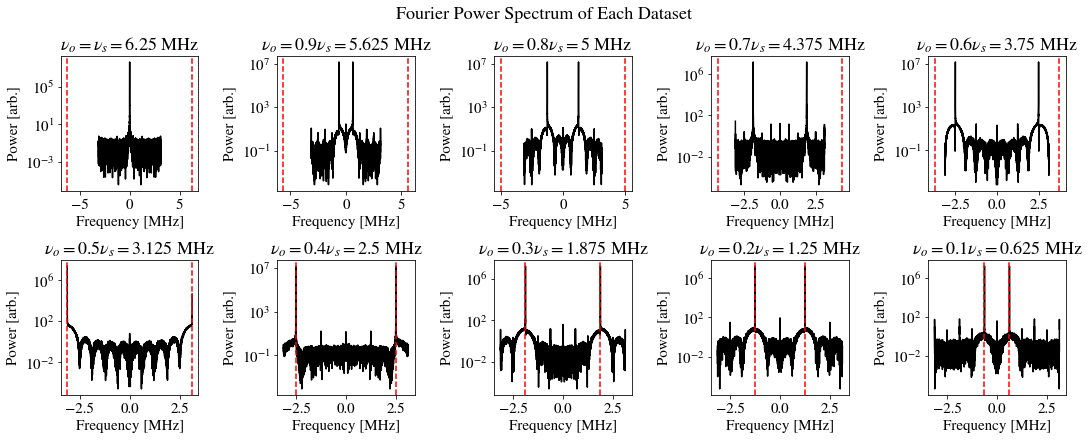

In [11]:
fig, axs = plt.subplots(2,5, sharex=False, sharey=False, figsize=(15,6), constrained_layout=True)
plt.suptitle('Fourier Power Spectrum of Each Dataset')

axs[0,0].semilogy(x, power_spectrum9, 'k')
axs[0,0].set_title('$\\nu_o = \\nu_s = 6.25$ MHz')
#axs[0,0].axvline(6.25)
axs[0,0].set_xlabel('Frequency [MHz]')
axs[0,0].set_ylabel('Power [arb.]')
axs[0,0].axvline(6.25, color='r', linestyle='--')
axs[0,0].axvline(-6.25, color='r', linestyle='--')

axs[0,1].semilogy(x, power_spectrum8, 'k')
axs[0,1].set_title('$\\nu_o = 0.9\\nu_s = 5.625$ MHz')
axs[0,1].set_xlabel('Frequency [MHz]')
axs[0,1].set_ylabel('Power [arb.]')
axs[0,1].axvline(5.625, color='r', linestyle='--')
axs[0,1].axvline(-5.625, color='r', linestyle='--')

axs[0,2].semilogy(x, power_spectrum7, 'k')
axs[0,2].set_title('$\\nu_o = 0.8\\nu_s = 5$ MHz')
axs[0,2].set_xlabel('Frequency [MHz]')
axs[0,2].set_ylabel('Power [arb.]')
axs[0,2].axvline(5, color='r', linestyle='--')
axs[0,2].axvline(-5, color='r', linestyle='--')

axs[0,3].semilogy(x, power_spectrum6, 'k')
axs[0,3].set_title('$\\nu_o = 0.7\\nu_s = 4.375$ MHz')
axs[0,3].set_xlabel('Frequency [MHz]')
axs[0,3].set_ylabel('Power [arb.]')
axs[0,3].axvline(4.375, color='r', linestyle='--')
axs[0,3].axvline(-4.375, color='r', linestyle='--')

axs[0,4].semilogy(x, power_spectrum5, 'k')
axs[0,4].set_title('$\\nu_o = 0.6\\nu_s = 3.75$ MHz')
axs[0,4].set_xlabel('Frequency [MHz]')
axs[0,4].set_ylabel('Power [arb.]')
axs[0,4].axvline(3.75, color='r', linestyle='--')
axs[0,4].axvline(-3.75, color='r', linestyle='--')

axs[1,0].semilogy(x, power_spectrum4, 'k')
axs[1,0].set_title('$\\nu_o = 0.5\\nu_s = 3.125$ MHz')
axs[1,0].set_xlabel('Frequency [MHz]')
axs[1,0].set_ylabel('Power [arb.]')
axs[1,0].axvline(3.125, color='r', linestyle='--')
axs[1,0].axvline(-3.125, color='r', linestyle='--')

axs[1,1].semilogy(x, power_spectrum3, 'k')
axs[1,1].set_title('$\\nu_o = 0.4\\nu_s = 2.5$ MHz')
axs[1,1].set_xlabel('Frequency [MHz]')
axs[1,1].set_ylabel('Power [arb.]')
axs[1,1].axvline(2.5, color='r', linestyle='--')
axs[1,1].axvline(-2.5, color='r', linestyle='--')

axs[1,2].semilogy(x, power_spectrum2, 'k')
axs[1,2].set_title('$\\nu_o = 0.3\\nu_s = 1.875$ MHz')
axs[1,2].set_xlabel('Frequency [MHz]')
axs[1,2].set_ylabel('Power [arb.]')
axs[1,2].axvline(1.875, color='r', linestyle='--')
axs[1,2].axvline(-1.875, color='r', linestyle='--')

axs[1,3].semilogy(x, power_spectrum1, 'k')
axs[1,3].set_title('$\\nu_o = 0.2\\nu_s = 1.25$ MHz')
axs[1,3].set_xlabel('Frequency [MHz]')
axs[1,3].set_ylabel('Power [arb.]')
axs[1,3].axvline(1.25, color='r', linestyle='--')
axs[1,3].axvline(-1.25, color='r', linestyle='--')

axs[1,4].semilogy(x, power_spectrum0, 'k')
axs[1,4].set_title('$\\nu_o = 0.1\\nu_s = 0.625$ MHz')
axs[1,4].set_xlabel('Frequency [MHz]')
axs[1,4].set_ylabel('Power [arb.]')
axs[1,4].axvline(0.625, color='r', linestyle='--')
axs[1,4].axvline(-0.625, color='r', linestyle='--')

plt.show()

Take one of the data captures and plot the real and imaginary parts of the spectra:

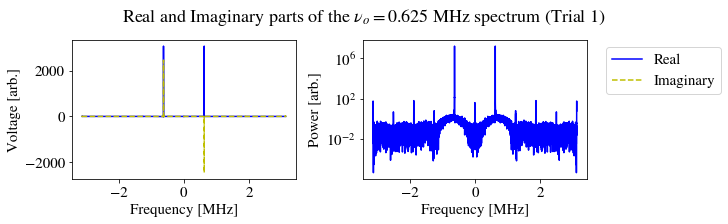

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=False, constrained_layout=True, figsize=(10,3))
plt.suptitle('Real and Imaginary parts of the $\\nu_o = 0.625$ MHz spectrum (Trial 1)')

ax1.plot(x, shift0.real, 'b', label='Real')
ax1.plot(x, shift0.imag, 'y--', label='Imaginary')
ax1.set_ylabel('Voltage [arb.]')
ax1.set_xlabel('Frequency [MHz]')
#ax1.legend()

ax2.semilogy(x, power_spectrum0.real, 'b', label='Real')
ax2.semilogy(x, power_spectrum0.imag, 'y--', label='Imaginary')
ax2.set_ylabel('Power [arb.]')
ax2.set_xlabel('Frequency [MHz]')
#ax2.legend()

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

The above plot shows how there exist both real and imaginary parts to the voltage spectra, but the power spectra is solely real. This is a reproducable result that can be similarly computed and shown for the other data sets collected. 

Take another trial collection of the 0.625 and 5 MHz frequencies and compare to the first trial. We want to see how the voltage spectra compare to one another, if at all.

In [ ]:
realization_0 = np.load('0.1_nu_s_realizations.npy')
realization_7 = np.load('0.8_nu_s_realizations.npy')

trial1_0 = realization_0[0]
trial2_0 = realization_0[1]
trial3_0 = realization_0[2]
trial4_0 = realization_0[3]
trial5_0 = realization_0[4]

trial1_7 = realization_7[0]
trial2_7 = realization_7[1]
trial3_7 = realization_7[2]
trial4_7 = realization_7[3]
trial5_7 = realization_7[4]

In [14]:
trial1_fftshift0 = np.fft.fftshift(np.fft.fft(trial1_0))
trial2_fftshift0 = np.fft.fftshift(np.fft.fft(trial2_0))
trial3_fftshift0 = np.fft.fftshift(np.fft.fft(trial3_0))
trial4_fftshift0 = np.fft.fftshift(np.fft.fft(trial4_0))
trial5_fftshift0 = np.fft.fftshift(np.fft.fft(trial5_0))

trial1_fftshift7 = np.fft.fftshift(np.fft.fft(trial1_7))
trial2_fftshift7 = np.fft.fftshift(np.fft.fft(trial2_7))
trial3_fftshift7 = np.fft.fftshift(np.fft.fft(trial3_7))
trial4_fftshift7 = np.fft.fftshift(np.fft.fft(trial4_7))
trial5_fftshift7 = np.fft.fftshift(np.fft.fft(trial5_7))

In [15]:
trial1_ps0 = np.abs(trial1_fftshift0)**2
trial2_ps0 = np.abs(trial2_fftshift0)**2
trial3_ps0 = np.abs(trial3_fftshift0)**2
trial4_ps0 = np.abs(trial4_fftshift0)**2
trial5_ps0 = np.abs(trial5_fftshift0)**2

trial1_ps7 = np.abs(trial1_fftshift7)**2
trial2_ps7 = np.abs(trial2_fftshift7)**2
trial3_ps7 = np.abs(trial3_fftshift7)**2
trial4_ps7 = np.abs(trial4_fftshift7)**2
trial5_ps7 = np.abs(trial5_fftshift7)**2

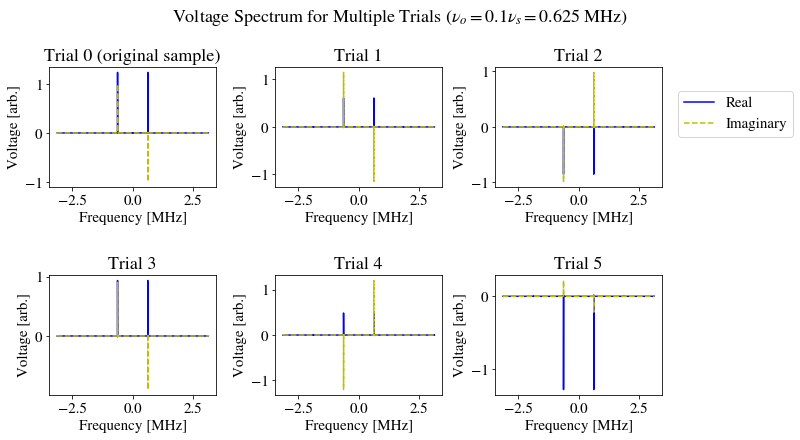

In [16]:
fig, axs = plt.subplots(2,3, sharex=False, figsize=(11,6), constrained_layout=True)
plt.suptitle('Voltage Spectrum for Multiple Trials ($\\nu_o = 0.1\\nu_s = 0.625$ MHz)')

axs[0,0].plot(x, shift0.real/2500, 'b-', label='Real')
axs[0,0].plot(x, shift0.imag/2500, 'y--', label='Imaginary')
axs[0,0].set_title('Trial 0 (original sample)')
#axs[0,0].legend()
axs[0,0].set_ylabel('Voltage [arb.]')
axs[0,0].set_xlabel('Frequency [MHz]')

axs[0,1].plot(x, trial1_fftshift0.real/1e8, 'b-', label='Real')
axs[0,1].plot(x, trial1_fftshift0.imag/1e8,'y--', label='Imaginary')
axs[0,1].set_title('Trial 1')
#axs[0,1].legend()
axs[0,1].set_ylabel('Voltage [arb.]')
axs[0,1].set_xlabel('Frequency [MHz]')

axs[0,2].plot(x, trial2_fftshift0.real/1e8, 'b-', label='Real')
axs[0,2].plot(x, trial2_fftshift0.imag/1e8,'y--', label='Imaginary')
axs[0,2].set_title('Trial 2')
#axs[0,2].legend()
axs[0,2].set_ylabel('Voltage [arb.]')
axs[0,2].set_xlabel('Frequency [MHz]')

axs[1,0].plot(x, trial3_fftshift0.real/1e8, 'b-', label='Real')
axs[1,0].plot(x, trial3_fftshift0.imag/1e8,'y--', label='Imaginary')
axs[1,0].set_title('Trial 3')
#axs[1,0].legend()
axs[1,0].set_ylabel('Voltage [arb.]')
axs[1,0].set_xlabel('Frequency [MHz]')

axs[1,1].plot(x, trial4_fftshift0.real/1e8, 'b-', label='Real')
axs[1,1].plot(x, trial4_fftshift0.imag/1e8,'y--', label='Imaginary')
axs[1,1].set_title('Trial 4')
#axs[1,1].legend()
axs[1,1].set_ylabel('Voltage [arb.]')
axs[1,1].set_xlabel('Frequency [MHz]')

axs[1,2].plot(x, trial5_fftshift0.real/1e8, 'b-', label='Real')
axs[1,2].plot(x, trial5_fftshift0.imag/1e8,'y--', label='Imaginary')
axs[1,2].set_title('Trial 5')
#axs[1,2].legend()
axs[1,2].set_ylabel('Voltage [arb.]')
axs[1,2].set_xlabel('Frequency [MHz]')

plt.legend(bbox_to_anchor=(1.05, 2.6), loc='upper left')

plt.show()


For this data set, we see that for each trial there are real and imaginary parts. However, the orientation and amplitudes of each may vary. Nonetheless, one thing remains constant: the frequenies, both real and imaginary, are always at $\pm 0.625$ MHz, regardless of trial, amplitude, or orientation. 

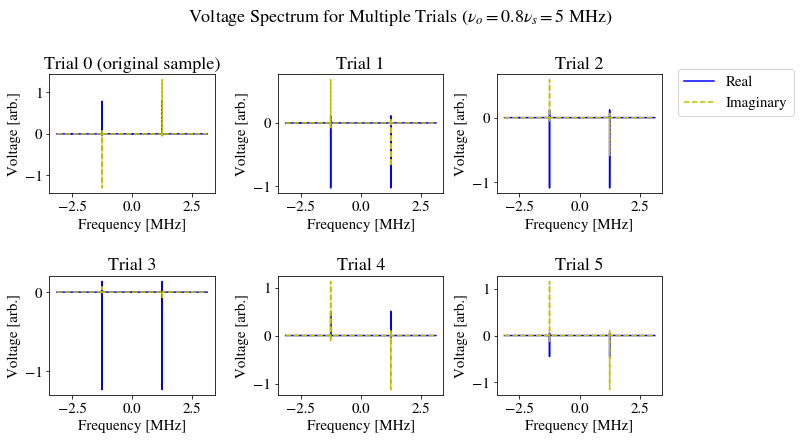

In [17]:
fig, axs = plt.subplots(2,3, sharex=False, figsize=(11,6), constrained_layout=True)
plt.suptitle('Voltage Spectrum for Multiple Trials ($\\nu_o = 0.8\\nu_s = 5$ MHz)')

axs[0,0].plot(x, shift7.real/2500, 'b-', label='Real')
axs[0,0].plot(x, shift7.imag/2500, 'y--', label='Imaginary')
axs[0,0].set_title('Trial 0 (original sample)')
#axs[0,0].legend()
axs[0,0].set_ylabel('Voltage [arb.]')
axs[0,0].set_xlabel('Frequency [MHz]')

axs[0,1].plot(x, trial1_fftshift7.real/1e8, 'b-', label='Real')
axs[0,1].plot(x, trial1_fftshift7.imag/1e8,'y--', label='Imaginary')
axs[0,1].set_title('Trial 1')
#axs[0,1].legend()
axs[0,1].set_ylabel('Voltage [arb.]')
axs[0,1].set_xlabel('Frequency [MHz]')

axs[0,2].plot(x, trial2_fftshift7.real/1e8, 'b-', label='Real')
axs[0,2].plot(x, trial2_fftshift7.imag/1e8,'y--', label='Imaginary')
axs[0,2].set_title('Trial 2')
#axs[0,2].legend()
axs[0,2].set_ylabel('Voltage [arb.]')
axs[0,2].set_xlabel('Frequency [MHz]')

axs[1,0].plot(x, trial3_fftshift7.real/1e8, 'b-', label='Real')
axs[1,0].plot(x, trial3_fftshift7.imag/1e8,'y--', label='Imaginary')
axs[1,0].set_title('Trial 3')
#axs[1,0].legend()
axs[1,0].set_ylabel('Voltage [arb.]')
axs[1,0].set_xlabel('Frequency [MHz]')

axs[1,1].plot(x, trial4_fftshift7.real/1e8, 'b-', label='Real')
axs[1,1].plot(x, trial4_fftshift7.imag/1e8,'y--', label='Imaginary')
axs[1,1].set_title('Trial 4')
#axs[1,1].legend()
axs[1,1].set_ylabel('Voltage [arb.]')
axs[1,1].set_xlabel('Frequency [MHz]')

axs[1,2].plot(x, trial5_fftshift7.real/1e8, 'b-', label='Real')
axs[1,2].plot(x, trial5_fftshift7.imag/1e8,'y--', label='Imaginary')
axs[1,2].set_title('Trial 5')
#axs[1,2].legend()
axs[1,2].set_ylabel('Voltage [arb.]')
axs[1,2].set_xlabel('Frequency [MHz]')

plt.legend(bbox_to_anchor=(1.05, 2.8), loc='upper left')

plt.show()


We see a similar result here as was shown in the other trail set. However, we saw above that aliasing occurs for this frequency. Therefore, we see that the voltage spectra is showing us a frequency that does not align with the input frequency. However, the frequency that it does read remains constant through the trials. Once again, orientation and amplitude vary from trial to trial.

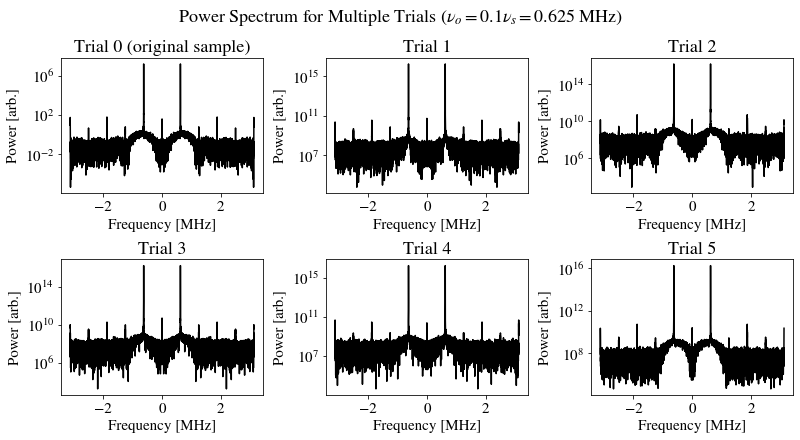

In [18]:
fig, axs = plt.subplots(2,3, sharex=False, sharey=False, figsize=(11,6), constrained_layout=True)
plt.suptitle('Power Spectrum for Multiple Trials ($\\nu_o = 0.1\\nu_s = 0.625$ MHz)')

axs[0,0].semilogy(x, power_spectrum0.real, 'k', label='Real')
axs[0,0].semilogy(x, power_spectrum0.imag, label='Imaginary')
axs[0,0].set_title('Trial 0 (original sample)')
axs[0,0].set_ylabel('Power [arb.]')
axs[0,0].set_xlabel('Frequency [MHz]')

axs[0,1].semilogy(x, trial1_ps0.real, 'k', label='Real')
axs[0,1].semilogy(x, trial1_ps0.imag, label='Imaginary')
axs[0,1].set_title('Trial 1')
axs[0,1].set_ylabel('Power [arb.]')
axs[0,1].set_xlabel('Frequency [MHz]')

axs[0,2].semilogy(x, trial2_ps0.real, 'k', label='Real')
axs[0,2].semilogy(x, trial2_ps0.imag, label='Imaginary')
axs[0,2].set_title('Trial 2')
axs[0,2].set_ylabel('Power [arb.]')
axs[0,2].set_xlabel('Frequency [MHz]')


axs[1,0].semilogy(x, trial3_ps0.real, 'k', label='Real')
axs[1,0].semilogy(x, trial3_ps0.imag, label='Imaginary')
axs[1,0].set_title('Trial 3')
axs[1,0].set_ylabel('Power [arb.]')
axs[1,0].set_xlabel('Frequency [MHz]')


axs[1,1].semilogy(x, trial4_ps0.real, 'k', label='Real')
axs[1,1].semilogy(x, trial4_ps0.imag, label='Imaginary')
axs[1,1].set_title('Trial 4')
axs[1,1].set_ylabel('Power [arb.]')
axs[1,1].set_xlabel('Frequency [MHz]')


axs[1,2].semilogy(x, trial5_ps0.real, 'k', label='Real')
axs[1,2].semilogy(x, trial5_ps0.imag, label='Imaginary')
axs[1,2].set_title('Trial 5')
axs[1,2].set_ylabel('Power [arb.]')
axs[1,2].set_xlabel('Frequency [MHz]')


plt.show()

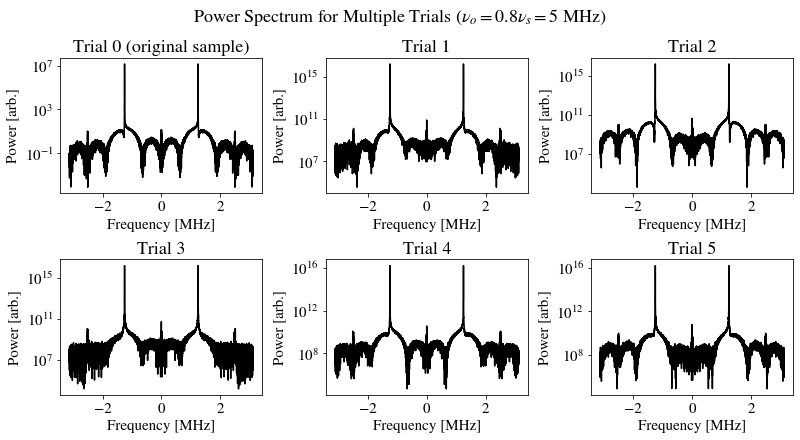

In [19]:
fig, axs = plt.subplots(2,3, sharex=False, sharey=False, figsize=(11,6), constrained_layout=True)
plt.suptitle('Power Spectrum for Multiple Trials ($\\nu_o = 0.8\\nu_s = 5$ MHz)')

axs[0,0].semilogy(x, power_spectrum7.real, 'k', label='Real')
axs[0,0].semilogy(x, power_spectrum7.imag, label='Imaginary')
axs[0,0].set_title('Trial 0 (original sample)')
axs[0,0].set_ylabel('Power [arb.]')
axs[0,0].set_xlabel('Frequency [MHz]')

axs[0,1].semilogy(x, trial1_ps7.real, 'k', label='Real')
axs[0,1].semilogy(x, trial1_ps7.imag, label='Imaginary')
axs[0,1].set_title('Trial 1')
axs[0,1].set_ylabel('Power [arb.]')
axs[0,1].set_xlabel('Frequency [MHz]')

axs[0,2].semilogy(x, trial2_ps7.real, 'k', label='Real')
axs[0,2].semilogy(x, trial2_ps7.imag, label='Imaginary')
axs[0,2].set_title('Trial 2')
axs[0,2].set_ylabel('Power [arb.]')
axs[0,2].set_xlabel('Frequency [MHz]')


axs[1,0].semilogy(x, trial3_ps7.real, 'k', label='Real')
axs[1,0].semilogy(x, trial3_ps7.imag, label='Imaginary')
axs[1,0].set_title('Trial 3')
axs[1,0].set_ylabel('Power [arb.]')
axs[1,0].set_xlabel('Frequency [MHz]')


axs[1,1].semilogy(x, trial4_ps7.real, 'k', label='Real')
axs[1,1].semilogy(x, trial4_ps7.imag, label='Imaginary')
axs[1,1].set_title('Trial 4')
axs[1,1].set_ylabel('Power [arb.]')
axs[1,1].set_xlabel('Frequency [MHz]')


axs[1,2].semilogy(x, trial5_ps7.real, 'k', label='Real')
axs[1,2].semilogy(x, trial5_ps7.imag, label='Imaginary')
axs[1,2].set_title('Trial 5')
axs[1,2].set_ylabel('Power [arb.]')
axs[1,2].set_xlabel('Frequency [MHz]')


plt.show()

Choose a power spectrum and take its inverse Fourier transform. For this to work, you need
to make sure dft.idft correctly infers the frequencies corresponding to each bins in your power
spectrum array, Separately, calculate the autocorrelation function (ACF) directly from the voltage
time series manually with dft/idft, with numpy.correlate, and with scipy.signal.correlate

In [57]:
# Using 0.625 MHz #

waveform = data['0.625 MHz']/2**15
padded = np.pad(waveform, (len(waveform), len(waveform)), mode='constant', constant_values=(0,0))

dft = ugradio.dft.dft(padded/(2**15))
power_dft = np.abs(dft[1])**2
dft_ACF = ugradio.dft.idft(power_dft, dft[0])

fft = np.fft.fft(padded/2**15)
power_fft = np.abs(fft)**2
fft_ACF = np.fft.fftshift(np.fft.ifft(power_fft))

In [58]:
import scipy.signal

numpy_ACF = np.correlate(padded/2**15, padded/2**15, mode='same')
scipy_ACF = scipy.signal.correlate(padded/2**15, padded/2**15, mode='same')

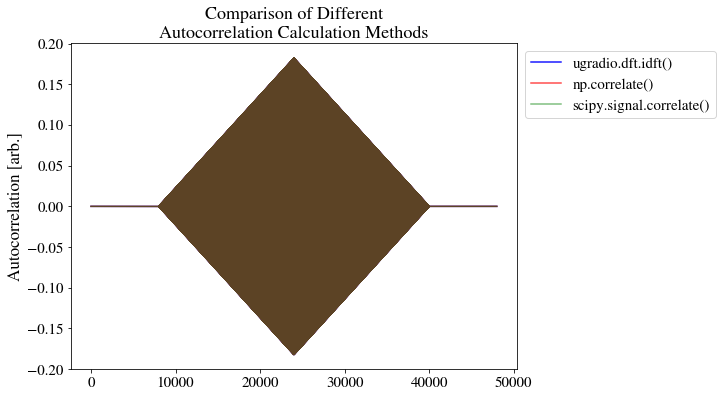

All close?:  True True


In [71]:
plt.figure(figsize=(8,6))
plt.plot(dft_ACF[1]*1e5, 'b', alpha=0.9, label="ugradio.dft.idft()")
plt.plot(numpy_ACF*1e5, 'r', alpha=0.7, label="np.correlate()")
plt.plot(scipy_ACF*1e5, 'g', alpha=0.5, label="scipy.signal.correlate()")
plt.ylabel('Autocorrelation [arb.]', fontsize=17)
plt.title('Comparison of Different\nAutocorrelation Calculation Methods')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

print('All close?: ', np.allclose(dft_ACF[1], numpy_ACF), np.allclose(dft_ACF[1], scipy_ACF))


ACF overlap with one another quite well, showing no preference for one over the other.

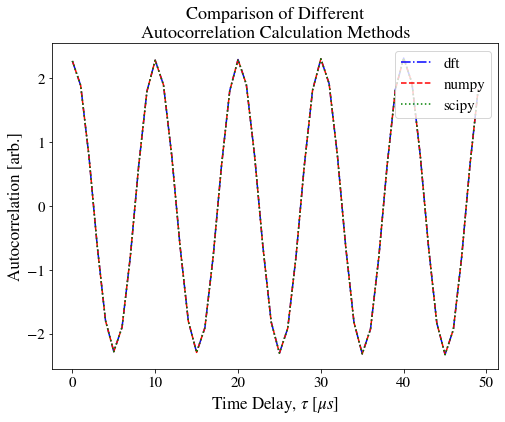

In [121]:
plt.figure(figsize=(8,6))
plt.plot(dft_ACF[1][10000:10050]*10**7, label='dft', color='blue', linestyle='-.')
plt.plot(numpy_ACF[10000:10050]*10**7, label='numpy', color='red', linestyle='--')
plt.plot(scipy_ACF[10000:10050]*10**7, label='scipy', color='green', linestyle=':')
plt.xlabel('Time Delay, $\\tau$ [$\\mu s$]', fontsize=17)
plt.ylabel('Autocorrelation [arb.]', fontsize=17)
plt.title('Comparison of Different\nAutocorrelation Calculation Methods')
plt.legend(loc='upper right')

# 5.4 Leakage Power

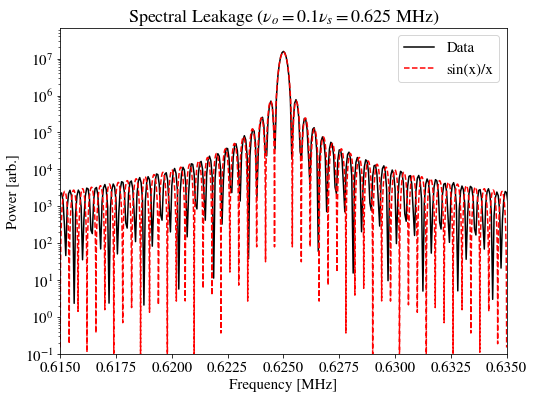

In [21]:
freqs = np.load('Fourier_100k_samples.npy')
power_spectrum = np.load('Power_100k_samples.npy')

plt.figure(figsize=(8,6))
plt.semilogy(freqs[0]/1e6, power_spectrum, 'k', label='Data')
linspace = np.linspace(0.61, 0.64, 5000)
plt.semilogy(linspace,1.5e7*np.sinc((linspace-0.625)*2500)**2, 'r--', label='sin(x)/x')
plt.xlim(0.615, 0.635)
plt.ylim(1e-1)
plt.legend()
plt.ylabel('Power [arb.]')
plt.xlabel('Frequency [MHz]')
plt.title('Spectral Leakage ($\\nu_o = 0.1\\nu_s =0.625$ MHz)')
plt.show()

# 5.5 Frequency Resolution

In [128]:
tenth = np.load('tenth.npy')[0][0]
hundredth = np.load('hundredth.npy')[0][0]
thousandth = np.load('thousandth.npy')[0][0]

freqs = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))

In [129]:
fft_tenth = np.fft.fftshift(np.fft.fft(tenth))
fft_hundredth = np.fft.fftshift(np.fft.fft(hundredth))
fft_thousandth = np.fft.fftshift(np.fft.fft(thousandth))

power_tenth = np.abs(fft_tenth)**2
power_hundredth = np.abs(fft_hundredth)**2
power_thousandth = np.abs(fft_thousandth)**2

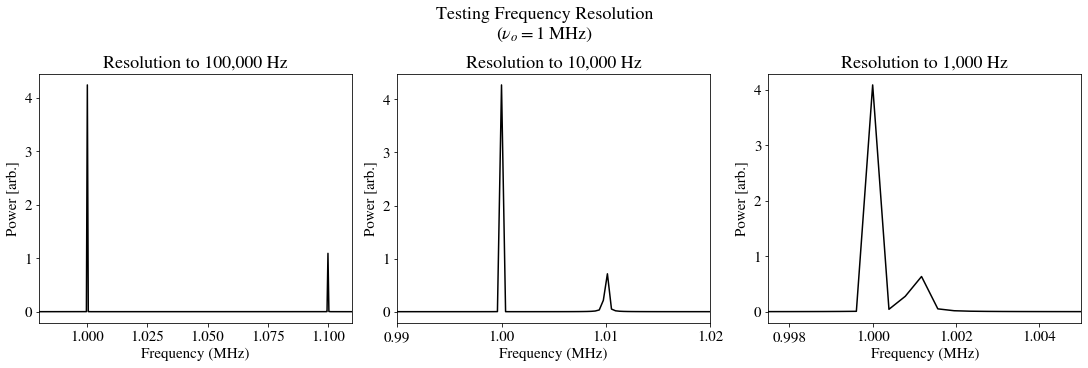

In [130]:
fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(15,5))
plt.suptitle('Testing Frequency Resolution\n($\\nu_o = 1$ MHz)')

axs[0].set_title('Resolution to 100,000 Hz')
axs[0].plot(freqs, power_tenth/10**15, 'k')
axs[0].set_xlim(0.98, 1.11)
axs[0].set_xlabel('Frequency (MHz)')
axs[0].set_ylabel('Power [arb.]')

axs[1].set_title('Resolution to 10,000 Hz')
axs[1].plot(freqs, power_hundredth/10**15, 'k')
axs[1].set_xlim(0.99, 1.02)
axs[1].set_xlabel('Frequency (MHz)')
axs[1].set_ylabel('Power [arb.]')

axs[2].set_title('Resolution to 1,000 Hz')
axs[2].plot(freqs, power_thousandth/10**15, 'k')
axs[2].set_xlim(0.9975, 1.005)
axs[2].set_xlabel('Frequency (MHz)')
axs[2].set_ylabel('Power [arb.]')

plt.show()

In [131]:
vsamp = 6.25e6
N = 16000


dft_thousandth = ugradio.dft.dft(thousandth/2**15, 
                          t=np.linspace(-N/(2.0*vsamp), N/(2.0*vsamp), num=16000, endpoint=False), 
                          f=np.linspace(-vsamp/2.,vsamp/2.,num=16000,endpoint=False), 
                          vsamp=6.25e6)

dft_32000 = ugradio.dft.dft(thousandth/2**15, 
                                t=np.linspace(-N/(2.0*vsamp), N/(2.0*vsamp), num=16000, endpoint=False), 
                                f=np.linspace(-vsamp/2., vsamp/2., num=32000, endpoint=False),
                                vsamp=6.25e6)

dft_64000 = ugradio.dft.dft(thousandth/2**15, 
                            t=np.linspace(-N/(2.0*vsamp), N/(2.0*vsamp), num=16000, endpoint=False),
                            f=np.linspace(-vsamp/2., vsamp/2., num=64000, endpoint=False),
                            vsamp=6.25e6)

In [132]:
ps_16000 = np.abs(dft_thousandth[1])**2
ps_32000 = np.abs(dft_32000[1])**2
ps_64000 = np.abs(dft_64000[1])**2

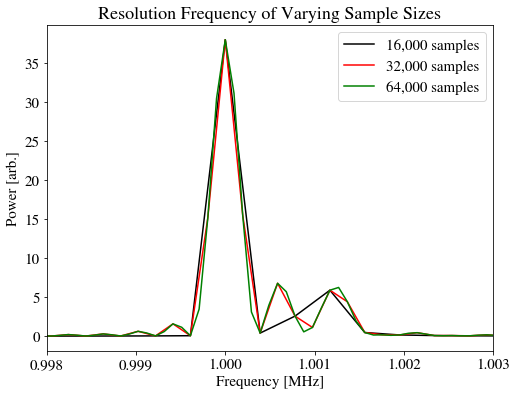

In [133]:
plt.figure(figsize=(8,6))

plt.plot(dft_thousandth[0]/1e6, ps_16000/1e5, 'k-', label='16,000 samples')
plt.plot(dft_32000[0]/1e6, ps_32000/1e5, 'r-', label='32,000 samples')
plt.plot(dft_64000[0]/1e6, ps_64000/1e5, 'g-', label='64,000 samples')
plt.xlabel("Frequency [MHz]")
plt.ylabel("Power [arb.]")
plt.title('Resolution Frequency of Varying Sample Sizes')
plt.legend()
plt.xlim(0.998, 1.003)

plt.show()

# 5.6 Nyquist Windows

In [3]:
window_1 = np.load('nyquist_window_1.npy')[0]
window_2 = np.load('nyquist_window_2.npy')[0]
window_2_5 = np.load('nyquist_window_2_5.npy')[0]
window_3 = np.load('nyquist_window_3.npy')[0]
window_3_5 = np.load('nyquist_window_3_5.npy')[0]
window_4 = np.load('nyquist_window_4.npy')[0]
window_5 = np.load('nyquist_window_5.npy')[0]
window_6 = np.load('nyquist_window_6.npy')[0]

In [4]:
power_1 = np.abs(np.fft.fftshift(np.fft.fft(window_1))[0])**2
power_2 = np.abs(np.fft.fftshift(np.fft.fft(window_2))[0])**2
power_2_5 = np.abs(np.fft.fftshift(np.fft.fft(window_2_5))[0])**2
power_3 = np.abs(np.fft.fftshift(np.fft.fft(window_3))[0])**2
power_3_5 = np.abs(np.fft.fftshift(np.fft.fft(window_3_5))[0])**2
power_4 = np.abs(np.fft.fftshift(np.fft.fft(window_4))[0])**2
power_5 = np.abs(np.fft.fftshift(np.fft.fft(window_5))[0])**2
power_6 = np.abs(np.fft.fftshift(np.fft.fft(window_6))[0])**2

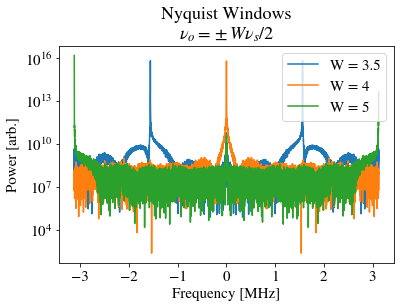

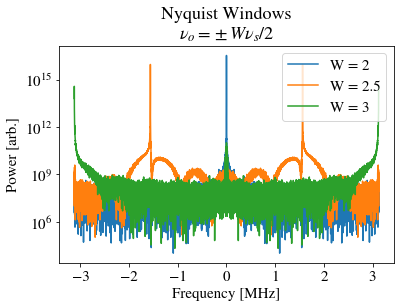

In [5]:
freqs = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))

plt.figure()
plt.semilogy(freqs, power_3_5, label='W = 3.5')
plt.semilogy(freqs, power_4, label='W = 4')
plt.semilogy(freqs, power_5, label='W = 5')
plt.title('Nyquist Windows\n$\\nu_o=\\pm W\\nu_s/2$')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [arb.]')
plt.legend()
plt.show()

plt.figure()
plt.semilogy(freqs, power_2, label='W = 2')
plt.semilogy(freqs, power_2_5, label='W = 2.5')
plt.semilogy(freqs, power_3, label='W = 3')
plt.title('Nyquist Windows\n$\\nu_o=\\pm W\\nu_s/2$')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [arb.]')
plt.legend(loc='upper right')
plt.show()

Nyquist criterion: $\nu_s\geq 2\nu_o \implies \nu_o\leq \nu_s/2 \implies $ all values of $W$ will fail to satisfy the Nyquist criterion

<Figure size 432x288 with 0 Axes>

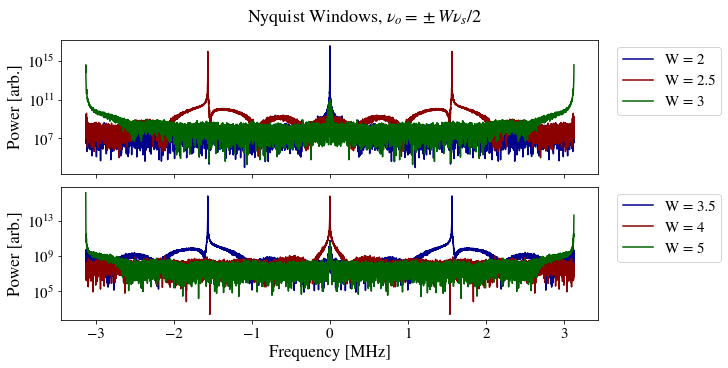

In [79]:
plt.figure()
fig, (ax0, ax1) = plt.subplots(2, 1, constrained_layout=True, sharex=True, sharey=False, figsize=(10,5))
plt.suptitle('Nyquist Windows, $\\nu_o=\\pm W\\nu_s/2$')

ax0.semilogy(freqs, power_2, label='W = 2', color='darkblue')
ax0.semilogy(freqs, power_2_5, label='W = 2.5', color='darkred')
ax0.semilogy(freqs, power_3, label='W = 3', color='darkgreen')
#ax0.title('Nyquist Windows\n$\\nu_o=\\pm W\\nu_s/2$')
#ax0.set_xlabel('Frequency [MHz]')
ax0.set_ylabel('Power [arb.]', fontsize=17)
ax0.legend(bbox_to_anchor=(1.02, 1.0), loc='upper left')

ax1.semilogy(freqs, power_3_5, label='W = 3.5', color='darkblue')
ax1.semilogy(freqs, power_4, label='W = 4', color='darkred')
ax1.semilogy(freqs, power_5, label='W = 5', color='darkgreen')
#ax0.title('Nyquist Windows\n$\\nu_o=\\pm W\\nu_s/2$')
ax1.set_xlabel('Frequency [MHz]', fontsize=17)
ax1.set_ylabel('Power [arb.]', fontsize=17)
#ax1.axvline(3.125)
ax1.legend(bbox_to_anchor=(1.02, 1.0), loc='upper left')

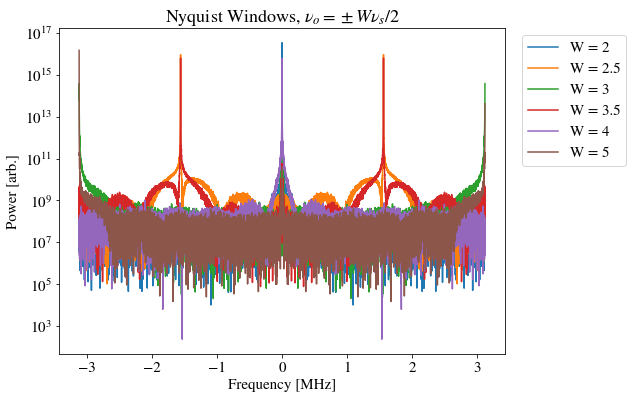

In [77]:
plt.figure(figsize=(8,6))
plt.title('Nyquist Windows, $\\nu_o=\\pm W\\nu_s/2$')
plt.semilogy(freqs, power_2, label='W = 2')
plt.semilogy(freqs, power_2_5, label='W = 2.5')
plt.semilogy(freqs, power_3, label='W = 3')
plt.semilogy(freqs, power_3_5, label='W = 3.5')
plt.semilogy(freqs, power_4, label='W = 4')
plt.semilogy(freqs, power_5, label='W = 5')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [arb.]')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='upper left')

All of these values are exceeding the Nyquist criterion. We therefore expect to see aliasing. However, so long as we take note that aliasing is occuring, we notice that the results are sensible. The Nyquist windows are not showing true frequency results but rather aliased results. The bandpass is equal to the sampling frequency. Therefore, we do not expect the ends of the frequency domain to exceed $\pm 3.125$ MHz. They don't (good). (For report: explain the "bouncing off" effect (aliasing) that is occuring that is producing the other windows/peaks.)

# 5.7 Fourier Transforms of Noise

In [6]:
noise_100_blocks = np.load('final_noise_data.npy')

noise_1 = noise_100_blocks[0][:1]
noise_2 = noise_100_blocks[0][:2]
noise_4 = noise_100_blocks[0][:4]
noise_8 = noise_100_blocks[0][:8]
noise_16 = noise_100_blocks[0][:16]
noise_100 = noise_100_blocks[0]

fft_2 = np.fft.fftshift(np.fft.fft(noise_2))
fft_4 = np.fft.fftshift(np.fft.fft(noise_4))
fft_8 = np.fft.fftshift(np.fft.fft(noise_8))
fft_16 = np.fft.fftshift(np.fft.fft(noise_16))
fft_100 = np.fft.fftshift(np.fft.fft(noise_100))

power_2 = np.abs(fft_2)**2
power_4 = np.abs(fft_4)**2
power_8 = np.abs(fft_8)**2
power_16 = np.abs(fft_16)**2
power_100 = np.abs(fft_100)**2

average_2 = np.mean(power_2, axis=0)
average_4 = np.mean(power_4, axis=0)
average_8 = np.mean(power_8, axis=0)
average_16 = np.mean(power_16, axis=0)
average_100 = np.mean(power_100, axis=0)

In [26]:
def gaussian(x, A, mu, std):
    return A*np.exp(-0.5*((x-mu)**2/std**2))
    
mu = np.mean(noise_16.flatten()/2**15)
std = np.std(noise_16.flatten()/2**15)
sigma = np.var(noise_16.flatten()/2**15)
A = np.max(noise_16.flatten()/2**15)

print(mu, std, sigma, A)

0.0138377685546875 0.0523419885366038 0.002739683763965964 0.3203125


0.0138377685546875 0.002739683763965964


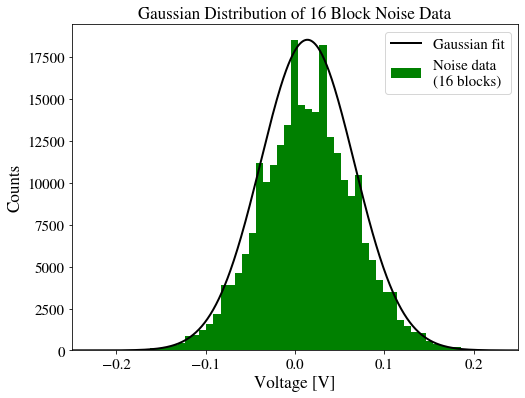

In [27]:
plt.figure(figsize=(8,6))

plt.hist(noise_16.flatten()/2**15, bins=75, color='g', label='Noise data\n(16 blocks)')

mu = np.mean(noise_16.flatten()/2**15)
std = np.std(noise_16.flatten()/2**15)
A = np.max(np.histogram(noise_16.flatten()/2**15, bins=75)[0])
print(mu, sigma)
x = np.linspace(-0.4,0.4, 1000)

plt.plot(x, gaussian(x, A, mu, std), 'k-', lw=2, label='Gaussian fit')
plt.xlabel('Voltage [V]', fontsize=17)
plt.ylabel('Counts', fontsize=17)
plt.title('Gaussian Distribution of 16 Block Noise Data', fontsize=17)
plt.legend()
plt.xlim(-0.25, 0.25)
plt.show()

<Figure size 432x288 with 0 Axes>

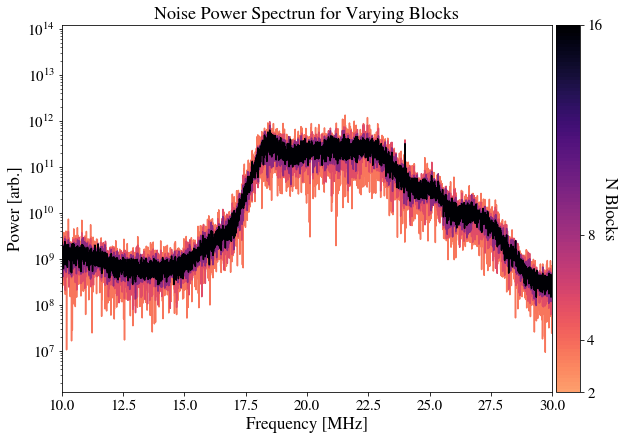

In [118]:
import matplotlib as mpl
import mpl_toolkits.axes_grid1 as axgrid
from mpl_toolkits.axes_grid1 import make_axes_locatable

freqs = np.fft.fftshift(np.fft.fftfreq(16000, d=1/62.5))

cmap = plt.cm.magma_r
n = 100
colors = cmap(np.linspace(0.2, 1, n))
cmap = mpl.colors.ListedColormap(colors)
nums = [2,4,8,16]
colors_choose = [colors[int((i/16)*100)-1] for i in nums]

plt.figure()
fig, ax = plt.subplots(1,1, figsize=(8,6), constrained_layout=True)
ax.semilogy(freqs, average_2, label='2', color=colors_choose[0])
ax.semilogy(freqs, average_4, label='4', color=colors_choose[1])
ax.semilogy(freqs, average_8, label='8', color=colors_choose[2])
ax.semilogy(freqs, average_16, label='16', color=colors_choose[3])
ax.set_xlim(10,30)
norm_scaling = mpl.colors.Normalize(vmin=2, vmax=16)
divider = axgrid.make_axes_locatable(ax)
cax = divider.append_axes("right", size='5%', pad = 0.05)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm_scaling, cmap=cmap), cax=cax, ticks=[2,4,8,16])
cbar.set_label("N Blocks", rotation=270, labelpad=15, fontsize=17)

ax.set_xlabel('Frequency [MHz]', fontsize=17)
ax.set_ylabel('Power [arb.]', fontsize=17)
ax.set_title('Noise Power Spectrun for Varying Blocks', fontsize=18)

plt.show()

In [81]:
def SNR(average):
    snr = np.mean(average/average_100)/np.std(average/average_100)
    return snr

In [85]:
print('SNR:\n2 Blocks: ', SNR(average_2))
print('4 Blocks: ', SNR(average_4))
print('8 Blocks: ', SNR(average_8))
print('16 Blocks: ', SNR(average_16))

print('\nCLT:\n2 Blocks:', np.sqrt(2), '\n4 Blocks', np.sqrt(4), '\n8 Blocks', np.sqrt(8), '\n16 Blocks', np.sqrt(16))

SNR:
2 Blocks:  1.414643145005197
4 Blocks:  2.02031102534187
8 Blocks:  2.872508160671939
16 Blocks:  4.195193366592109

CLT:
2 Blocks: 1.4142135623730951 
4 Blocks 2.0 
8 Blocks 2.8284271247461903 
16 Blocks 4.0


# 7.1 The Double-SideBand (DSB) Mixer

In [134]:
mixed_plus = np.load('mixed_plus.npy')
mixed_minus = np.load('mixed_minus.npy')

For each case, plot the power spectrum:

In [135]:
vs = 62.5e6  # 62.5 MHz
x = np.fft.fftshift(np.fft.fftfreq(16000, 1/vs)/1e6)

fft_mixed_plus = np.fft.fft(mixed_plus[0][0]/2**16)
fft_mixed_minus = np.fft.fft(mixed_minus[0][0]/2**16)

shift_mixed_plus = np.fft.fftshift(fft_mixed_plus)
shift_mixed_minus = np.fft.fftshift(fft_mixed_minus)

ps_mixed_plus = np.abs(shift_mixed_plus)**2
ps_mixed_minus = np.abs(shift_mixed_minus)**2

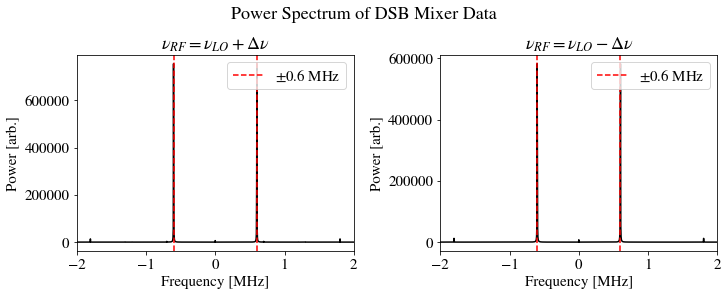

In [136]:
fig, axs = plt.subplots(1,2, sharex=False, sharey=False, constrained_layout=True, figsize=(10,4))
plt.suptitle('Power Spectrum of DSB Mixer Data')

axs[0].plot(x, ps_mixed_plus, 'k')
axs[0].set_title('$\\nu_{RF}=\\nu_{LO}+\\Delta \\nu$')
axs[0].set_ylabel('Power [arb.]')
axs[0].set_xlabel('Frequency [MHz]')
axs[0].set_xlim(-2,2)
axs[0].axvline(-0.6, color= 'r', linestyle='--')
axs[0].axvline(0.6, color='r', linestyle='--', label='$\\pm 0.6$ MHz')
axs[0].legend(loc='upper right')

axs[1].plot(x, ps_mixed_minus, 'k')
axs[1].set_title('$\\nu_{RF}=\\nu_{LO}-\\Delta \\nu$')
axs[1].set_ylabel('Power [arb.]')
axs[1].set_xlabel('Frequency [MHz]')
axs[1].set_xlim(-2,2)
axs[1].axvline(-0.6, color= 'r', linestyle='--')
axs[1].axvline(0.6, color='r', linestyle='--', label='$\\pm 0.6$ MHz')
axs[1].legend(loc='upper right')

plt.show()

#cos(-delta v) = cos(delta v)

Why do the plots look the way they do?

For one of the cases, plot the waveform:

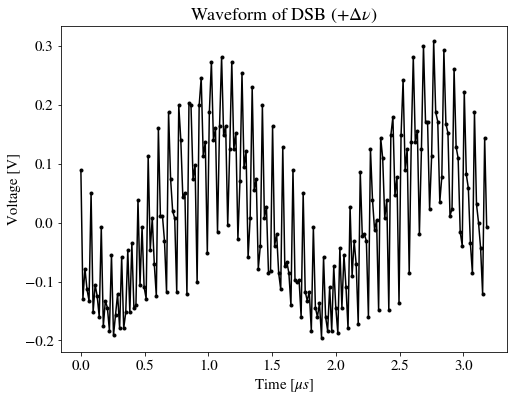

In [137]:
times = np.linspace(0, (1/vs)*16000, 16000)*10**6

plt.figure(figsize=(8,6))
plt.plot(times[0:200], mixed_plus[0][0][0:200]/2**16, 'k', marker='.')
plt.title('Waveform of DSB ($+\\Delta \\nu$)')
plt.ylabel('Voltage [V]')
plt.xlabel('Time [$\\mu s$]')
plt.show()

Take the Fourier transform (not the power spectrum) of the waveform and remove the sum frequency component by zeroing both the real and imaginary portions (this is Fourier filtering). Recreate the signal from the filtered transform by taking the inverse transform and plot the filtered signal versus time. 

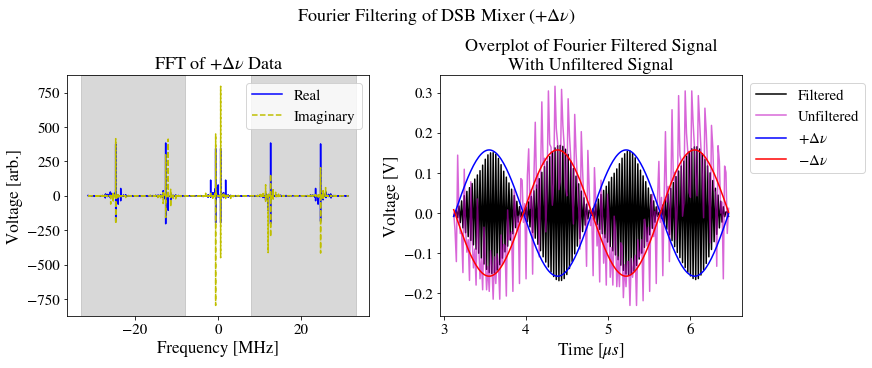

In [173]:
waveform = mixed_plus[0][0]
fft_waveform = np.fft.fftshift(np.fft.fft(waveform))
freqs = np.fft.fftshift(np.fft.fftfreq(16000, 1/vs)/1e6)


fig, axs = plt.subplots(1,2, constrained_layout=True, figsize=(12,5))
plt.suptitle('Fourier Filtering of DSB Mixer ($+\\Delta \\nu$)')

axs[0].plot(freqs, fft_waveform.real/2**16, 'b', label='Real')
axs[0].plot(freqs, fft_waveform.imag/2**16, 'y--', label='Imaginary')
axs[0].legend()
#axs[0].set_xlim(-8,8)
axs[0].axvspan(-33, -8, alpha=0.3, color='grey')
axs[0].axvspan(8, 33, alpha=0.3, color='grey')
axs[0].set_ylabel('Voltage [arb.]', fontsize=17)
axs[0].set_xlabel('Frequency [MHz]', fontsize=17)
axs[0].set_title('FFT of $+\\Delta \\nu$ Data')


fft_waveform[10000:] = 0
fft_waveform[:6000] = 0
inverse_fft_waveform = np.fft.ifft(fft_waveform)
axs[1].plot(times[195:405], inverse_fft_waveform[195:405]/2**16, 'k', label='Filtered')
axs[1].plot(times[195:405], waveform[195:405]/2**16, 'm', alpha=0.6, label='Unfiltered')
axs[1].plot(times[195:405], 0.1575*np.sin(2*np.pi*0.6*times[195:405]+0.75), 'b', label='$+\\Delta \\nu$')
axs[1].plot(times[195:405], 0.1575*np.sin(-2*np.pi*0.6*times[195:405]-0.75), 'r', label='$-\\Delta \\nu$')
axs[1].legend(bbox_to_anchor=(1,1), loc='upper left')
axs[1].set_xlabel('Time [$\\mu s$]', fontsize=17)
axs[1].set_ylabel('Voltage [V]', fontsize=17)
axs[1].set_title('Overplot of Fourier Filtered Signal\nWith Unfiltered Signal')

plt.show()

# 7.2

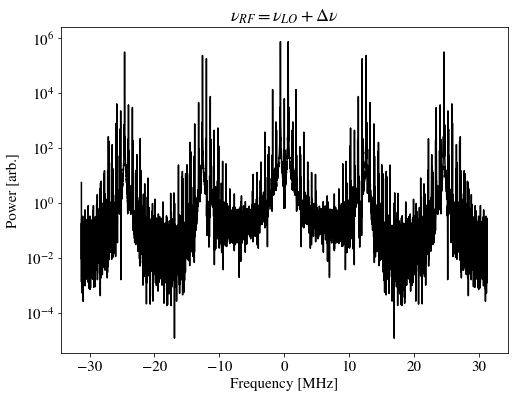

In [167]:
plt.figure(figsize=(8,6))
plt.semilogy(x, ps_mixed_plus, 'k')
plt.title('$\\nu_{RF}=\\nu_{LO}+\\Delta \\nu$')
plt.ylabel('Power [arb.]')
plt.xlabel('Frequency [MHz]')
plt.show()

# 7.3 

In [168]:
no_phase_shift_plus = np.load('no_shift_plus.npy')
no_phase_shift_minus = np.load('no_shift_minus.npy')

phase_shift_plus = np.load('phase_shift_plus.npy')
phase_shift_plus_real = phase_shift_plus[0]
phase_shift_plus_imag = phase_shift_plus[1]

phase_shift_minus =  np.load('phase_shift_minus.npy')
phase_shift_minus_real = phase_shift_minus[0]
phase_shift_minus_imag = phase_shift_minus[1]

vo = 30e6
vs = 62.5e6
dt = 1/vs
x = np.fft.fftshift(np.fft.fftfreq(16000, dt)/1e6)

In [169]:
fft_no_phase_plus = np.fft.fftshift(np.fft.fft(no_phase_shift_plus[0][0]))
fft_no_phase_minus = np.fft.fftshift(np.fft.fft(no_phase_shift_minus[0][0]))

power_no_phase_plus = np.abs(fft_no_phase_plus)**2
power_no_phase_minus = np.abs(fft_no_phase_minus)**2

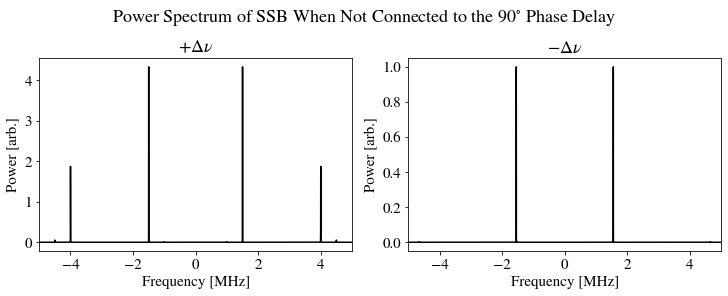

In [170]:
fig, axs = plt.subplots(1,2, sharex=False, sharey=False, constrained_layout=True, figsize=(10,4))
plt.suptitle('Power Spectrum of SSB When Not Connected to the 90$^{\\circ}$ Phase Delay')

axs[0].plot(x, power_no_phase_plus/10**14, 'k')
#axs[0].axvline(1.5, color='r', linestyle='--')
#axs[0].axvline(-1.5, color='r', linestyle='--')
axs[0].set_title('$+\\Delta \\nu$')
axs[0].set_xlabel('Frequency [MHz]')
axs[0].set_ylabel('Power [arb.]')
axs[0].set_xlim(-5,5)


axs[1].plot(x, power_no_phase_minus/10**15, 'k')
#axs[1].axvline(1.5, color='r', linestyle='--')
#axs[1].axvline(-1.5, color='r', linestyle='--')
axs[1].set_title('$-\\Delta \\nu$')
axs[1].set_xlabel('Frequency [MHz]')
axs[1].set_ylabel('Power [arb.]')
axs[1].set_xlim(-5,5)


plt.show()

In [171]:
phase_plus = phase_shift_plus_real + 1j*phase_shift_plus_imag
phase_minus = phase_shift_minus_real + 1j*phase_shift_minus_imag

fft_phase_plus = np.fft.fftshift(np.fft.fft(phase_plus))
fft_phase_minus = np.fft.fftshift(np.fft.fft(phase_minus))

power_phase_plus = np.abs(fft_phase_plus)**2
power_phase_minus = np.abs(fft_phase_minus)**2

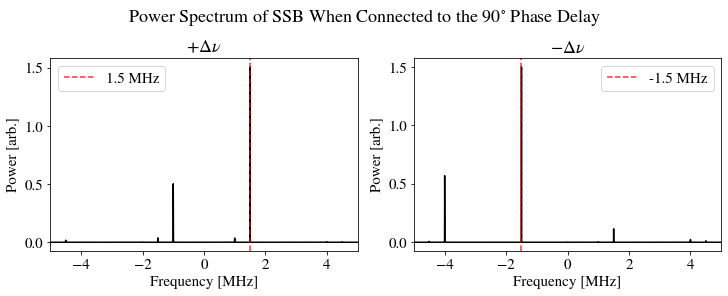

In [172]:
fig, axs = plt.subplots(1,2, sharex=False, sharey=False, constrained_layout=True, figsize=(10,4))
plt.suptitle('Power Spectrum of SSB When Connected to the 90$^{\\circ}$ Phase Delay')

axs[0].plot(x, power_phase_plus[0]/10**15, 'k')
axs[0].axvline(1.5, color='r', linestyle='--', alpha =0.8, label='1.5 MHz')
#axs[0].axvline(-1.5, color='r', linestyle='--')
axs[0].set_title('$+\\Delta \\nu$')
axs[0].set_xlabel('Frequency [MHz]')
axs[0].set_ylabel('Power [arb.]')
axs[0].set_xlim(-5,5)
axs[0].legend()

axs[1].plot(x, power_phase_minus[0]/10**15, 'k')
#axs[1].axvline(1.5, color='r', linestyle='--')
axs[1].axvline(-1.5, color='r', linestyle='--', alpha =0.8, label='-1.5 MHz')
axs[1].set_title('$-\\Delta \\nu$')
axs[1].set_xlabel('Frequency [MHz]')
axs[1].set_ylabel('Power [arb.]')
axs[1].set_xlim(-5,5)
axs[1].legend()

plt.show()